In [ ]:
!pip install nltk

In [ ]:
import re
import pandas as pd
import matplotlib.pyplot as plt
import glob
import nltk
from functools import reduce
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import STOPWORDS, WordCloud
from collections import Counter
nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
all_files=glob.glob('exportExcelData*.xls') #다 합침
all_files

['exportExcelData_20251112190323.xls',
 'exportExcelData_20251112190740.xls',
 'exportExcelData_20251112190720.xls',
 'exportExcelData_20251112190755.xls',
 'exportExcelData_20251112190615.xls',
 'exportExcelData_20251112190730.xls',
 'exportExcelData_20251112190804.xls',
 'exportExcelData_20251112190636.xls',
 'exportExcelData_20251112190705.xls',
 'exportExcelData_20251112190649.xls']

In [ ]:
all_files_data=[] #리스트에 넣음

for i in all_files:
    df=pd.read_excel(i)
    all_files_data.append(df)

all_files_data[0]

,Unnamed: 0,번호,제목,저자,출판사,출판일
0,NaN,1,Architecting Time-Critical Big-Data Systems,"Basanta-Val, P.; Audsley, N. C.; Wellings, A. ...",unknown,2016
1,NaN,2,<bold>D</bold>ense <bold>o</bold>r <bold>S</bo...,"Choi, Unho",unknown,2022
2,NaN,3,Computation migration: a new approach to execu...,"Nunes, Rickey T. P.; Deshpande, Santosh L.",Inderscience,2018
3,NaN,4,A Game Theoretic Approach for Addressing Domai...,"Raghavan, Krishnan",unknown,2022
4,NaN,5,A trust-based crowdfunding campaign marketing ...,"Baah-Peprah, Prince; Shneor, Rotem",Inderscience,2021
...,...,...,...,...,...,...
95,NaN,96,A Weighted GraphSAGE-Based Context-Aware Appro...,"SHAN, D.;DU, X.;WANG, W.;LIU, A.WANG, N.",Mary Ann Liebert,2024
96,NaN,97,Optimal Feature Selection for Big Data Classif...,"Selvi, Ramar Senthamil; Valarmathi, Muniyappan...",Mary Ann Leibert,2020
97,NaN,98,Big data (lost) in the cloud,"Di Martino, Beniamino; Aversa, Rocco; Cretella...",Inderscience,2014
98,NaN,99,Call for Special Issue Papers: Big Data Analyt...,"El-Latif, Ahmed A. Abd; Tawalbeh, Lo'ai; Maleh...",Mary Ann Leibert,2021


In [ ]:
all_files_data_concat = pd.concat(all_files_data, axis=0, ignore_index=True)
all_files_data_concat.tail()

,Unnamed: 0,번호,제목,저자,출판사,출판일
995,NaN,96,The role of big data analytics in personalised...,"Surangi, H.A.K.N.S.",Inderscience,2023
996,NaN,97,A platform for big data analytics on distribut...,"Aye, Kyar Nyo; Thein, Thandar",Inderscience,2015
997,NaN,98,A hybrid neuro-fuzzy technique to overcome clu...,"Maithri, C.",Inderscience,2023
998,NaN,99,Optimized Deep Learning for EEG Big Data and S...,"Hosseini, M.; Pompili, D.; Elisevich, K.; Solt...",unknown,2017
999,NaN,100,Taxi-Passenger-Demand Modeling Based on Big Da...,"Zhang, D.; He, T.; Lin, S.; Munir, S.; Stankov...",unknown,2017


In [ ]:
all_title=all_files_data_concat['제목']
all_title

,제목
0,Architecting Time-Critical Big-Data Systems
1,<bold>D</bold>ense <bold>o</bold>r <bold>S</bo...
2,Computation migration: a new approach to execu...
3,A Game Theoretic Approach for Addressing Domai...
4,A trust-based crowdfunding campaign marketing ...
...,...
995,The role of big data analytics in personalised...
996,A platform for big data analytics on distribut...
997,A hybrid neuro-fuzzy technique to overcome clu...
998,Optimized Deep Learning for EEG Big Data and S...


In [ ]:
stopWords=set(stopwords.words("english"))
lemma=WordNetLemmatizer()

words=[]

for title in all_title:
  EnWords=re.sub(r"[^a-zA-Z]", " ", str(title))
  EnWordsToken=word_tokenize(EnWords.lower())
  EnWordsTokenStop=[words for words in EnWordsToken if words not in stopWords]
  EnWordsTokenStopLemma=[lemma.lemmatize(words) for words in EnWordsTokenStop]
  words.extend(EnWordsTokenStopLemma)

print(words)

['architecting', 'time', 'critical', 'big', 'data', 'system', 'bold', 'bold', 'ense', 'bold', 'bold', 'r', 'bold', 'bold', 'parse', 'elastic', 'spmm', 'implementation', 'optimal', 'big', 'data', 'processing', 'computation', 'migration', 'new', 'approach', 'execute', 'big', 'data', 'bioinformatics', 'workflow', 'game', 'theoretic', 'approach', 'addressing', 'domain', 'shift', 'big', 'data', 'trust', 'based', 'crowdfunding', 'campaign', 'marketing', 'framework', 'theoretical', 'underpinnings', 'big', 'data', 'analytics', 'practice', 'big', 'data', 'driven', 'futuristic', 'fabric', 'system', 'societal', 'digital', 'transformation', 'call', 'special', 'issue', 'paper', 'big', 'data', 'driven', 'futuristic', 'fabric', 'system', 'societal', 'digital', 'transformation', 'role', 'teamwork', 'analysis', 'big', 'data', 'study', 'visual', 'analytics', 'box', 'office', 'prediction', 'big', 'data', 'new', 'method', 'idea', 'geological', 'scientific', 'research', 'call', 'special', 'issue', 'paper',

data : 1092
big : 1015
analytics : 185
based : 116
analysis : 112
approach : 80
using : 79
system : 77
model : 68
special : 63
framework : 62
issue : 62
learning : 59
algorithm : 53
management : 51
application : 50
call : 49
paper : 49
distributed : 47
processing : 43
efficient : 43
review : 40
research : 39
survey : 38
driven : 35
scalable : 35
machine : 35
smart : 34
perspective : 33
warehouse : 31
cloud : 30
spatial : 30
mining : 29
earth : 29
science : 27
platform : 27
healthcare : 26
mapreduce : 26
new : 25
intelligent : 25
process : 23
method : 22
era : 22
city : 22
health : 22
gaussian : 22
approximation : 22
modeling : 21
challenge : 21
sustainable : 21


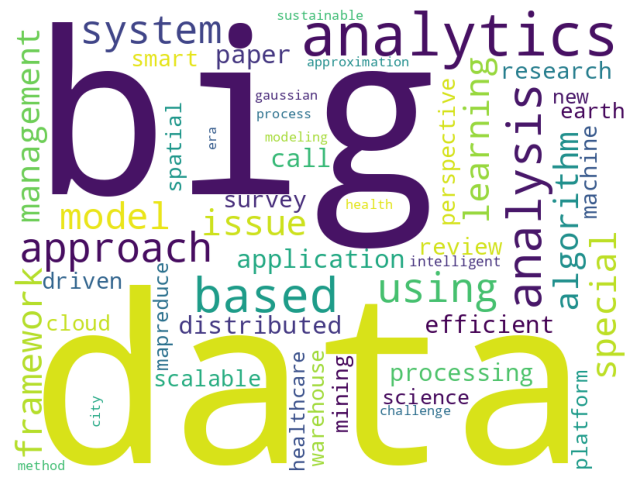

In [ ]:
word_count=dict()

for tag, counts in Counter(words).most_common(50):
  if(len(str(tag)))>1:
    word_count[tag]=counts
    print("%s : %d" % (tag, counts))

stopwords=set(STOPWORDS)

wc=WordCloud(background_color="white", stopwords=stopWords, width=800, height=600)
cloud=wc.generate_from_frequencies(word_count)

plt.figure(figsize=(8,8))
plt.imshow(cloud)
plt.axis("off")
plt.show()